In [1]:
import json
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt

with open('config.json') as json_data_file:
    data = json.load(json_data_file)

user = data['postgresql']['user']
password = data['postgresql']['password']
host = data['postgresql']['host']
db = data['postgresql']['db'] 
connection_url = 'postgresql://{user}:{password}@{host}/{db}'.format(user=user, password=password, host=host, db=db)
print('JSON loaded')

JSON loaded


In [2]:
engine = sqlalchemy.create_engine(connection_url)
connection = engine.connect()
print('hooked up connection to DB')

hooked up connection to DB


In [3]:
employee_query = 'SELECT * FROM employees ORDER BY emp_no'
employees_df = pd.read_sql_query(employee_query, engine)
employees_df.head(5)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [4]:
salary_query = 'SELECT * FROM salaries'
salaries_df = pd.read_sql_query(salary_query, engine)
salaries_df.head(5)

,emp_no,salary,from_date,to_date
0,10001,60117.0,1986-06-26,1987-06-26
1,10002,65828.0,1996-08-03,1997-08-03
2,10003,40006.0,1995-12-03,1996-12-02
3,10004,40054.0,1986-12-01,1987-12-01
4,10005,78228.0,1989-09-12,1990-09-12


In [5]:
department_query = 'SELECT * FROM departments'
departments_df = pd.read_sql_query(department_query, engine)
departments_df.head(5)

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [6]:
title_query = 'SELECT * FROM titles'
titles_df = pd.read_sql_query(title_query, engine)
titles_df.head(5)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [7]:
department_employee_query = 'SELECT * FROM department_employee'
department_employee_df = pd.read_sql_query(department_employee_query, engine)
department_employee_df.head(5)

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [8]:
manager_query = 'SELECT * FROM department_manager'
managers_df = pd.read_sql_query(manager_query, engine)
managers_df.head(5)

,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,9999-01-01
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,9999-01-01
4,d003,110183,1985-01-01,1992-03-21


In [9]:
# average salary by title
employee_salary = titles_df.merge(salaries_df, on='emp_no')[['emp_no', 'title', 'salary']]
employee_salary.head(5)

,emp_no,title,salary
0,10001,Senior Engineer,60117.0
1,10002,Staff,65828.0
2,10003,Senior Engineer,40006.0
3,10004,Engineer,40054.0
4,10004,Senior Engineer,40054.0


In [10]:
title_salary_grouped = employee_salary.groupby('title')['salary'].mean().round(2)
title_salary_grouped = title_salary_grouped.reset_index()
title_salary_grouped = title_salary_grouped.set_index('title')
title_salary_grouped.head(5)

,salary
title,
Assistant Engineer,48493.20
Engineer,48539.78
Manager,51531.04
Senior Engineer,48506.75
Senior Staff,58503.29


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1208a97f0>]],
      dtype=object)

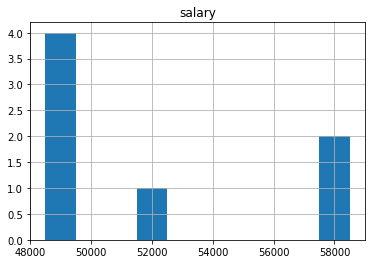

In [11]:
title_salary_grouped.hist(column='salary')

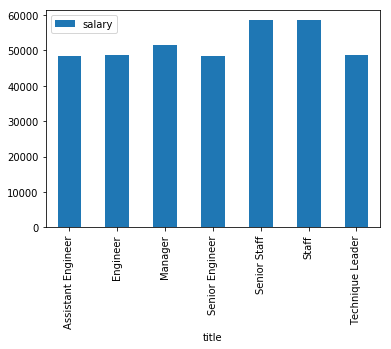

In [12]:
title_salary_grouped.plot.bar()